# Toy data - Regression

__Objectives:__ 

- Create a template script for future analyses using a simple toy dataset.
- Enrich Catana functionality to enhance future analyses by factorising useful scripts into simple routines.
    - Develop visualisation functionality into Catana.
    - Develop an analysis workflow functionality into Catana.
    - Develop efficient and distributed algorithms for analysis in Catana.

In [5]:
import sys
sys.path.insert(1, r'R:\Projects\catana')

In [6]:
import altair as alt
import catana as ca
import seaborn as sns
import matplotlib.pyplot as plt

from catana.plotting.altchart import AltChart
from pandas.plotting import scatter_matrix

# 0 Setup

In [7]:
import numpy as np
np.random.seed(42)

from catana.analysis.transform import ndarray_to_df
from sklearn.datasets import samples_generator

X, y = samples_generator.make_classification(n_samples=1000, n_informative=2, n_redundant=0, n_features=3,
                                             random_state=42)

df = ndarray_to_df(X, y)

# 1 Explore Data

- Characteristics of each attribute:
    - Name, type, missing data, noise, pdf type, descriptive power, target or feature
- Visualise
- Measure correlations between features

In [8]:
df

,x0,x1,x2,y0
0,0.326745,1.452468,-0.453248,105.750673
1,0.024219,-1.067533,2.062525,63.868176
2,-0.827231,0.322719,-0.288659,8.107895
3,1.683928,1.047098,0.224452,121.365929
4,0.681891,1.044161,-0.489439,62.627864
...,...,...,...,...
995,0.640480,-0.466495,0.996571,35.710281
996,-1.138833,0.622207,0.300474,85.799299
997,-0.956436,-1.293273,0.719758,-68.272609
998,0.159856,0.092845,-0.548725,-35.794396


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
x0    1000 non-null float64
x1    1000 non-null float64
x2    1000 non-null float64
y0    1000 non-null float64
dtypes: float64(4)
memory usage: 31.4 KB


In [10]:
df.describe()

,x0,x1,x2,y0
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.046960,-0.005969,0.055011,3.916927
std,0.981119,1.008570,0.970212,124.141837
min,-3.019512,-3.241267,-2.940389,-391.838108
25%,-0.604172,-0.688545,-0.584350,-79.282430
50%,0.042202,-0.017285,0.056832,1.595614
75%,0.679584,0.670550,0.664346,88.485671
max,3.852731,3.193108,3.926238,469.274717


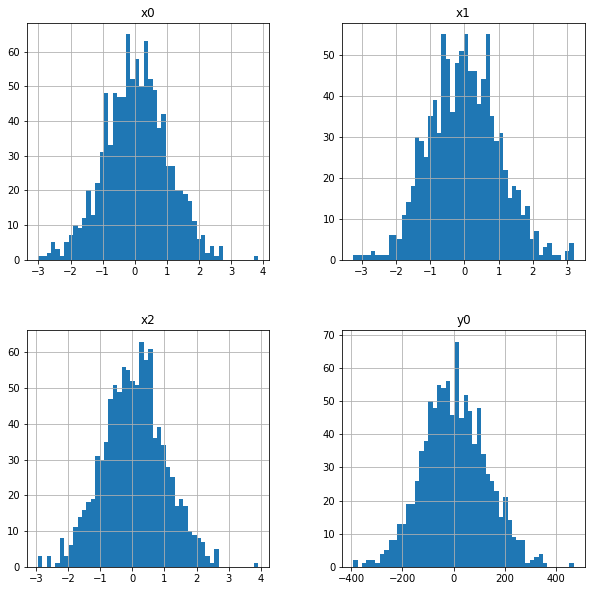

In [11]:
df.hist(bins=50, figsize=(10,10));

- Three features, one target
- x0, x2 are bimodal, x1 is gaussian
- y0 is binary

# 1.1. Visualise features

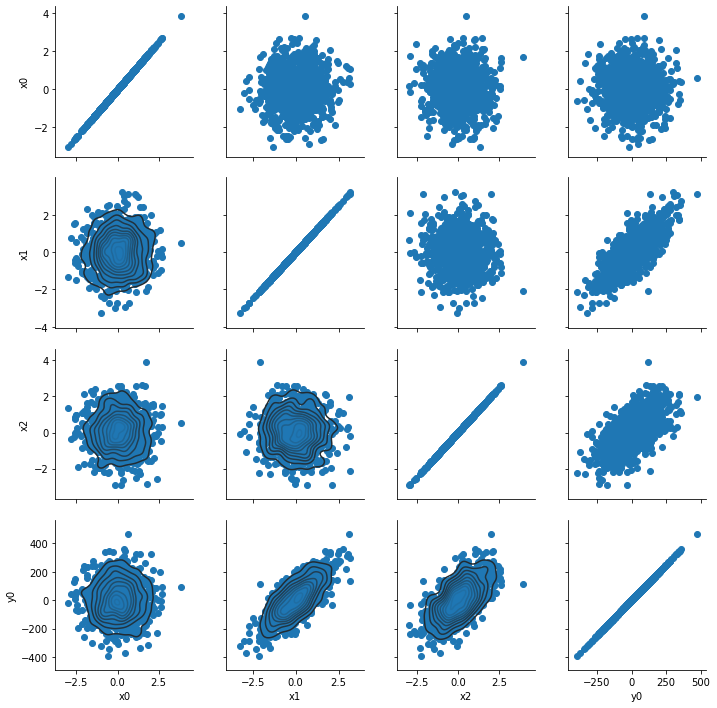

In [13]:
g = sns.PairGrid(df)
g.map(plt.scatter)
g.map_lower(sns.kdeplot);

In [ ]:
g = sns.pairplot(df, hue="y0", palette="Set2", diag_kind="kde", height=2.5);

- x0 is gaussian in y0, different means for each y0
- x1 is gaussian in y0, same means
- x2 is bimodal in y0 = 0, gaussian in y0 = 1

In [ ]:
chart = AltChart(data=df, size=(1, 1)).facet(rows=['x0', 'x1', 'x2'], columns=['x0', 'x1', 'x2'], color='y0', width=200, height=200, pos=(0, 0))
chart.display()

In [11]:

selection_1 = alt.selection(type='interval', resolve='global')
chart = AltChart(data=df, size=(1, 1)
                ).pairgrid(
    meta='Variable explore',
    variables=['x0', 'x1', 'x2'], 
    color='y0', stack=False,
    #brush=selection_1,  # Enables you to draw on the chart
    #selection=selection_1,
    width=50, height=50, pos=(0, 0))
chart.display()

TypeError: histogram() got an unexpected keyword argument 'alpha'

## 1.2 Correlations

In [ ]:
corr_matrix = df.corr()
corr_matrix["y0"].sort_values(ascending=False)

- x0 has strongest correlation with y0, x1 and x2 are of similar strength

## 1.2 Summary

__One target:__
- __y0__ - Binary

__Three features:__
- __x0__ - Bimodal, strongly correlated with _y0_. Gaussian in _y0_, different means for each _y0_.
- __x1__ - Gaussian, strongly correlated with _y0_. Gaussian in _y0_, same means for each _y0_.
- __x2__ - Bimodal, strongly correlated with _y0_. Bimodal in _y0 = 0_, gaussian in _y0 = 1_.

# 2 Data transform

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

In [20]:
n_jobs = 1
std_scale_tr = ColumnTransformer([
    ('standard_scaler', StandardScaler(), ['x0', 'x1', 'x2'])
], n_jobs=n_jobs, remainder='drop', verbose=True)
std_scale_tr.fit_transform(df)

[ColumnTransformer]  (1 of 1) Processing standard_scaler, total=   0.0s


array([[ 0.70320444,  2.01629723,  0.22140118],
       [-0.9517282 , -0.26459854,  0.41720264],
       [ 1.25038081,  0.25855113, -1.63888308],
       ...,
       [-0.41513321, -0.50473229,  1.46634219],
       [-0.51319754,  0.26324107, -0.56280274],
       [ 1.5763135 ,  0.74645862, -1.53418785]])

# 3 Training

In [ ]:
- Learning curves

# 4 Benchmarking